<a href="https://colab.research.google.com/github/Huang-Yongzhi/MusicLM_Jupyter/blob/main/musiclm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

如果重新运行，需要重启，不然trainer会报错，认为有多个实例

# 一、加载数据
## 1.安装必要的包

In [2]:
# !pip install you-get
!pip install yt-dlp
!sudo apt-get install ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 70.7 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


## 加载数据集

**数据集内容**

调用的.csv文件内容如下
```
ytid,start_s,end_s,audioset_positive_labels,aspect_list,caption,author_id,is_balanced_subset,is_audioset_eval
-0Gj8-vB1q4,30,40,"/m/0140xf,/m/02cjck,/m/04rlf","['low quality', 'sustained strings melody', 'soft female vocal', 'mellow piano melody', 'sad', 'soulful', 'ballad']","The low quality recording features a ballad song that contains sustained strings, mellow piano melody and soft female vocal singing over it. It sounds sad and soulful, like something you would hear at Sunday services.",4,False,True
...
```

In [3]:
import pandas as pd

#  GitHub 上的 .csv 文件的 Raw 链接
url = "https://raw.githubusercontent.com/Huang-Yongzhi/MusicLM_Jupyter/main/Data/musiccaps-public.csv"

df = pd.read_csv(url)

# 显示数据以验证加载正确
print(df.head())

# 指定文件保存路径
file_path = '/content/musiccaps-public.csv'

# 将 DataFrame 保存为 CSV 文件
df.to_csv(file_path, index=False)  # 设置index=False以防止添加额外的索引列


# 检查文件是否已保存
!ls /content


          ytid  start_s  end_s  \
0  -0Gj8-vB1q4       30     40   
1  -0SdAVK79lg       30     40   
2  -0vPFx-wRRI       30     40   
3  -0xzrMun0Rs       30     40   
4  -1LrH01Ei1w       30     40   

                            audioset_positive_labels  \
0                       /m/0140xf,/m/02cjck,/m/04rlf   
1  /m/0155w,/m/01lyv,/m/0342h,/m/042v_gx,/m/04rlf...   
2                                /m/025_jnm,/m/04rlf   
3                                 /m/01g90h,/m/04rlf   
4                                /m/02p0sh1,/m/04rlf   

                                         aspect_list  \
0  ['low quality', 'sustained strings melody', 's...   
1  ['guitar song', 'piano backing', 'simple percu...   
2  ['amateur recording', 'finger snipping', 'male...   
3  ['backing track', 'jazzy', 'digital drums', 'p...   
4  ['rubab instrument', 'repetitive melody on dif...   

                                             caption  author_id  \
0  The low quality recording features a ballad so...  

**解释**：
数据集是一个包含音频信息和描述的元数据文件，格式类似于 CSV。每行包含一个 YouTube 音频的标识符（ytid），音频的开始和结束时间（start_s 和 end_s），音频标签（audioset_positive_labels）和其他相关信息。



## 使用 yt-dlp 下载音频
使用如 youtube-dl，yt-dlp 等 这类工具来下载视频，然后使用音频处理库（例如 librosa 或 pydub）来裁剪音频。但是**youtube-dl还是停留在2021年，很多功能不能用了**....


下载 YouTube 音频
首先，需要安装 yt-dlp：

In [4]:
# !pip install yt-dlp

测试yt-dlp

In [5]:
# !yt-dlp -f140 -x --audio-format mp3 https://www.youtube.com/watch?v=-0vPFx-wRRI

测试命令行

In [6]:
# import subprocess
# import os
# import glob

# ytid = "-0xzrMun0Rs"  # 示例 YouTube 视频ID
# start_s = 10  # 裁剪开始时间（秒）
# end_s = 20    # 裁剪结束时间（秒）
# audio_output_dir = '/content/downloaded_audios'  # 音频输出目录

# # 确保输出目录存在
# os.makedirs(audio_output_dir, exist_ok=True)

# video_url = f'https://www.youtube.com/watch?v={ytid}'
# temp_audio_path_pattern  = os.path.join(audio_output_dir, f'{ytid}_temp.*')
# output_audio_path = os.path.join(audio_output_dir, f'{ytid}.wav')


# try:
#     # 下载音频， 修改这段命令可以测试命令行是否正确
#     subprocess.run(['yt-dlp', '-x', '--audio-format', 'wav', '-o', temp_audio_path_pattern, video_url], check=True)

#     # 查找下载的音频文件
#     downloaded_files = glob.glob(temp_audio_path_pattern)
#     if not downloaded_files:
#         raise Exception("Downloaded audio file not found.")
#     downloaded_audio_path = downloaded_files[0]  # 取得实际下载的文件路径

#     # 使用 ffmpeg 裁剪音频
#     subprocess.run(['ffmpeg', '-i', downloaded_audio_path, '-ss', str(start_s), '-to', str(end_s), '-c', 'copy', output_audio_path], check=True)
#     os.remove(downloaded_audio_path)  # 删除临时文件
#     print(f"Audio downloaded and trimmed: {output_audio_path}")
# except subprocess.CalledProcessError as e:
#     print(f"Error: {e}")


**有两种方案**

方案一：使用 yt-dlp 命令行工具的 --download-sections 参数来直接下载特定时间段的音频。

方案二：在 yt-dlp 命令下载视频以后，利用ffmpeg来剪裁。
yt-dlp 命令中使用了 --postprocessor-args 选项，但没有指定具体哪个后处理器（post-processor）应该使用这些参数。
我们需要参数应用于 ffmpeg 音频裁剪处理器。

方案一：
使用进程而不是线程，因为：

使用多进程（num_proc=cores），**在处理 CPU 密集型任务（如音频处理）时通常比多线程更有效率**。这是因为 Python 的线程受到全局解释器锁（GIL）的限制，而多进程可以绕过这个限制，充分利用多核 CPU。

使用了线程池（ThreadPoolExecutor），在 Python 中，**线程主要适用于 I/O 密集型任务**，而对于 CPU 密集型任务，由于 GIL 的存在，其效率通常低于多进程。


In [7]:
# 加载进度条
!pip install tqdm


In [8]:
import subprocess
import os
import pandas as pd
from tqdm import tqdm
from concurrent.futures import as_completed
from concurrent.futures import ProcessPoolExecutor
import glob

def download_audio(ytid, start_s, end_s, audio_output_dir, num_attempts=5):
    video_url = f'https://www.youtube.com/watch?v={ytid}'
    output_audio_path = os.path.join(audio_output_dir, f'{ytid}.wav')

    command = f"""
        yt-dlp --quiet --no-warnings
        -x --audio-format wav -f bestaudio
        -o "{output_audio_path}" --download-sections "*{start_s}-{end_s}" {video_url}
    """.strip()

    attempts = 0
    while attempts < num_attempts:
         # 尝试下载多次以确保成功。
      try:
          subprocess.run(command, check=True, shell=True)
          # 使用run指令更通用，用于执行命令并等待其完成。替代旧的函数如 call, check_call, check_output。
          return output_audio_path
      except subprocess.CalledProcessError as e:
          print(f"Attempt {attempts + 1} failed for {ytid}: {e}")
          attempts += 1
      print(f"Failed to download audio for {ytid} after {num_attempts} attempts.")
      return None


def download_and_process_audio(ytid, start_s, end_s, audio_output_dir):
    output_audio_path = os.path.join(audio_output_dir, f'{ytid}.wav')

    # 检查音频文件是否已存在
    if not os.path.exists(output_audio_path):
        # 如果不存在，则下载音频
        downloaded_path = download_audio(ytid, start_s, end_s, audio_output_dir)
        if downloaded_path:
            print(f"Downloaded audio to {downloaded_path}.")
        else:
            print(f"Failed to download audio for {ytid}.")
    else:
        print(f"Audio file already exists for {ytid}. Skipping download.")




# 加载CSV文件
csv_file = '/content/musiccaps-public.csv'  # colab
# csv_file = '/kaggle/input/musiccaps/musiccaps-public.csv'  # kaggle

df = pd.read_csv(csv_file)

audio_output_dir = './downloaded_audios'  # 音频输出目录

# 确保输出目录存在
os.makedirs(audio_output_dir, exist_ok=True)

# 使用进程池，这里的进程池数量可以改一下
cores = 100 # 进程数量
samples = 200 # 样本数量

# 工作进程数量
with ProcessPoolExecutor(max_workers=cores) as executor:
    # 准备将来的结果
    future_to_ytid = {executor.submit(
        download_and_process_audio,
        row['ytid'], row['start_s'], row['end_s'],
        audio_output_dir
        ): row['ytid'] for index, row in df.iterrows() if index < samples}

    # 使用 tqdm 来显示进度
    for future in tqdm(as_completed(future_to_ytid), total=len(future_to_ytid)):
        ytid = future_to_ytid[future]
        try:
            future.result()  # 获取结果或抛出异常
        except Exception as e:
            print(f"{ytid} generated an exception: {e}")



  0%|          | 0/200 [00:00<?, ?it/s]

Attempt 1 failed for -sevczF5etI: Command 'yt-dlp --quiet --no-warnings -x --audio-format wav -f bestaudio -o "./downloaded_audios/-sevczF5etI.wav" --download-sections "*30-40" https://www.youtube.com/watch?v=-sevczF5etI' returned non-zero exit status 1.
Failed to download audio for -sevczF5etI after 5 attempts.
Failed to download audio for -sevczF5etI.


  0%|          | 1/200 [01:14<4:07:48, 74.71s/it]

Downloaded audio to ./downloaded_audios/-ByoSbgzr4M.wav.


  1%|          | 2/200 [02:31<4:10:11, 75.81s/it]

Downloaded audio to ./downloaded_audios/-JVWfFPBl84.wav.


  2%|▏         | 3/200 [02:31<2:16:02, 41.43s/it]

Downloaded audio to ./downloaded_audios/-m5ZlWziIeA.wav.


  2%|▏         | 4/200 [02:32<1:22:26, 25.24s/it]

Downloaded audio to ./downloaded_audios/-mB_XLq6g1g.wav.


  2%|▎         | 5/200 [02:32<52:49, 16.26s/it]  

Downloaded audio to ./downloaded_audios/-OUIEnuNd1I.wav.


  3%|▎         | 6/200 [02:34<36:31, 11.30s/it]

Downloaded audio to ./downloaded_audios/-_6RxZyi30Q.wav.


  4%|▎         | 7/200 [02:35<25:28,  7.92s/it]

Downloaded audio to ./downloaded_audios/-mA_bqD1tgU.wav.Downloaded audio to ./downloaded_audios/-88me9bBzrk.wav.


  4%|▍         | 8/200 [02:35<17:35,  5.50s/it]

  4%|▍         | 9/200 [02:35<12:13,  3.84s/it]

Downloaded audio to ./downloaded_audios/-dVgUSrR8g4.wav.


  5%|▌         | 10/200 [02:36<08:57,  2.83s/it]

Downloaded audio to ./downloaded_audios/-4SYC2YgzL8.wav.


  6%|▌         | 11/200 [02:36<06:37,  2.10s/it]

Downloaded audio to ./downloaded_audios/-pUfYFcsgG4.wav.


  6%|▌         | 12/200 [02:39<06:47,  2.17s/it]

Downloaded audio to ./downloaded_audios/-tKZOl4q1Kw.wav.


  6%|▋         | 13/200 [02:40<06:13,  2.00s/it]

Downloaded audio to ./downloaded_audios/-e4wXAy1iVo.wav.


  7%|▋         | 14/200 [02:42<06:20,  2.05s/it]

Downloaded audio to ./downloaded_audios/-1OlgJWehn8.wav.


  8%|▊         | 15/200 [02:43<05:04,  1.65s/it]

Downloaded audio to ./downloaded_audios/-3Kv4fdm7Uk.wav.


  8%|▊         | 16/200 [02:43<03:50,  1.25s/it]

Downloaded audio to ./downloaded_audios/-f6s6kQEHFY.wav.


  8%|▊         | 17/200 [02:44<03:17,  1.08s/it]

Downloaded audio to ./downloaded_audios/-tpq_bzSKes.wav.Downloaded audio to ./downloaded_audios/-SWaCArvQug.wav.


  9%|▉         | 18/200 [02:45<02:50,  1.07it/s]

 10%|▉         | 19/200 [02:45<02:19,  1.30it/s]

Downloaded audio to ./downloaded_audios/-1UWSisR2zo.wav.


 10%|█         | 20/200 [02:45<01:59,  1.51it/s]

Downloaded audio to ./downloaded_audios/-ZHpNr_KRXU.wav.Downloaded audio to ./downloaded_audios/-WvVG0wHcTc.wav.



 10%|█         | 21/200 [02:46<01:55,  1.55it/s]

Downloaded audio to ./downloaded_audios/-6HBGg1cAI0.wav.


 12%|█▏        | 23/200 [02:47<01:57,  1.51it/s]

Downloaded audio to ./downloaded_audios/-hSMzrWZCAE.wav.Downloaded audio to ./downloaded_audios/-CUp_Tmg2Y0.wav.
Downloaded audio to ./downloaded_audios/-XkbErI_7EU.wav.


 12%|█▎        | 25/200 [02:48<01:25,  2.06it/s]

 13%|█▎        | 26/200 [02:48<01:09,  2.52it/s]

Downloaded audio to ./downloaded_audios/-YIT4HBM__g.wav.Downloaded audio to ./downloaded_audios/-M6K3QoHh40.wav.Downloaded audio to ./downloaded_audios/-Gf4Ihv1zwc.wav.Downloaded audio to ./downloaded_audios/-8C-gydUbR8.wav.

Downloaded audio to ./downloaded_audios/-5f6hjZf9Yw.wav.Downloaded audio to ./downloaded_audios/-Umconw-CRE.wav.

 14%|█▎        | 27/200 [02:50<01:59,  1.44it/s]

 14%|█▍        | 28/200 [02:50<01:35,  1.81it/s]

 14%|█▍        | 29/200 [02:50<01:16,  2.24it/s]


Downloaded audio to ./downloaded_audios/-Bu7YaslRW0.wav.Downloaded audio to ./downloaded_audios/-6pcgdLfb_A.wav.

 16%|█▋        | 33/200 [02:51<00:49,  3.39it/s]

Downloaded audio to ./downloaded_audios/-IZbvEO9wzU.wav.


 17%|█▋        | 34/200 [02:51<00:44,  3.73it/s]

 18%|█▊        | 36/200 [02:51<00:32,  4.97it/s]

Downloaded audio to ./downloaded_audios/-RYtUAsNhF0.wav.Downloaded audio to ./downloaded_audios/-VclCul6FrI.wav.

 18%|█▊        | 37/200 [02:51<00:33,  4.82it/s]


Downloaded audio to ./downloaded_audios/-7B9tPuIP-w.wav.

 19%|█▉        | 38/200 [02:52<00:33,  4.79it/s]

 20%|█▉        | 39/200 [02:52<00:34,  4.69it/s]

Downloaded audio to ./downloaded_audios/-5FoeegAgvU.wav.

 20%|██        | 40/200 [02:52<00:38,  4.16it/s]

 20%|██        | 41/200 [02:52<00:32,  4.88it/s]

Downloaded audio to ./downloaded_audios/-cLzki-B06o.wav.

 21%|██        | 42/200 [02:52<00:35,  4.43it/s]


Downloaded audio to ./downloaded_audios/-r2-9oyIzkQ.wav.

 24%|██▎       | 47/200 [02:53<00:16,  9.39it/s]


Downloaded audio to ./downloaded_audios/-XN0NtrnfMY.wav.


 24%|██▍       | 49/200 [02:53<00:18,  8.29it/s]

Downloaded audio to ./downloaded_audios/-5xOcMJpTUk.wav.Downloaded audio to ./downloaded_audios/-7wUQP6G5EQ.wav.


 26%|██▋       | 53/200 [02:53<00:16,  9.15it/s]

 27%|██▋       | 54/200 [02:54<00:16,  8.79it/s]


Downloaded audio to ./downloaded_audios/-i9gpG3vPwA.wav.Downloaded audio to ./downloaded_audios/-hYRFCQdbLg.wav.

Downloaded audio to ./downloaded_audios/-m9pH0WXQto.wav.Downloaded audio to ./downloaded_audios/-JvB5AL59fM.wav.


 28%|██▊       | 55/200 [02:54<00:28,  5.13it/s]

Downloaded audio to ./downloaded_audios/-1LrH01Ei1w.wav.

 28%|██▊       | 56/200 [02:54<00:30,  4.65it/s]

Downloaded audio to ./downloaded_audios/-0vPFx-wRRI.wav.
Downloaded audio to ./downloaded_audios/-M-6VinyMiY.wav.
Downloaded audio to ./downloaded_audios/-sRFfU8k0Zs.wav.




 28%|██▊       | 57/200 [02:55<00:47,  2.99it/s]

Downloaded audio to ./downloaded_audios/-T4GeTHKtJQ.wav.Downloaded audio to ./downloaded_audios/-r7iz-9v9bA.wav.

Downloaded audio to ./downloaded_audios/-i9uQMysy_A.wav.
Downloaded audio to ./downloaded_audios/-FlvaZQOr2I.wav.

 30%|██▉       | 59/200 [02:56<00:50,  2.80it/s]


Downloaded audio to ./downloaded_audios/-8cgbhIR_pw.wav.Downloaded audio to ./downloaded_audios/-kpR93atgd8.wav.


 32%|███▏      | 63/200 [02:56<00:30,  4.51it/s]


Downloaded audio to ./downloaded_audios/-OAyRsvFGgc.wav.Downloaded audio to ./downloaded_audios/-DeAdhYKbGE.wav.Downloaded audio to ./downloaded_audios/-Vo4CAMX26U.wav.Downloaded audio to ./downloaded_audios/-qcTD2o6I9s.wav.



Downloaded audio to ./downloaded_audios/-bgHkxwoliw.wav.
Downloaded audio to ./downloaded_audios/-_OzT7Xyvok.wav.

 32%|███▎      | 65/200 [02:57<00:38,  3.51it/s]


Downloaded audio to ./downloaded_audios/-YATTKBtmRA.wav.
Downloaded audio to ./downloaded_audios/-EVRXQpt1-8.wav.Downloaded audio to ./downloaded_audios/-R0267o4lLk.wav.Downloaded audio to ./downloaded_audios/-cQ-jUTEgck.wav.

 33%|███▎      | 66/200 [02:58<00:49,  2.71it/s]

 34%|███▍      | 68/200 [02:58<00:39,  3.37it/s]


Downloaded audio to ./downloaded_audios/-tmY1GEH3_Y.wav.

 34%|███▍      | 69/200 [02:59<00:38,  3.43it/s]


Downloaded audio to ./downloaded_audios/-v5hgCh3M2w.wav.Downloaded audio to ./downloaded_audios/-FFx68qSAuY.wav.Downloaded audio to ./downloaded_audios/-QuWdnmn-kM.wav.


 35%|███▌      | 70/200 [02:59<00:42,  3.08it/s]

 36%|███▌      | 71/200 [02:59<00:37,  3.45it/s]

 36%|███▌      | 72/200 [02:59<00:32,  3.94it/s]

Downloaded audio to ./downloaded_audios/-BIMKnb3tlo.wav.


 37%|███▋      | 74/200 [03:02<01:30,  1.39it/s]

Downloaded audio to ./downloaded_audios/-fxh7jAJR8U.wav.
Downloaded audio to ./downloaded_audios/-O9mnfC61Ac.wav.


 38%|███▊      | 75/200 [03:04<02:02,  1.02it/s]

Downloaded audio to ./downloaded_audios/-4NLarMj4xU.wav.


 38%|███▊      | 76/200 [03:04<01:46,  1.17it/s]

Downloaded audio to ./downloaded_audios/-NmjCyqIavI.wav.


 38%|███▊      | 77/200 [03:06<01:58,  1.04it/s]

Downloaded audio to ./downloaded_audios/-6QGvxvaTkI.wav.


 39%|███▉      | 78/200 [03:06<01:38,  1.24it/s]

Downloaded audio to ./downloaded_audios/-eDAoheZrY8.wav.Downloaded audio to ./downloaded_audios/-Dtir74TiUM.wav.


 40%|███▉      | 79/200 [03:07<01:32,  1.31it/s]


Downloaded audio to ./downloaded_audios/-lPXTBXa0tE.wav.


 40%|████      | 81/200 [03:08<01:27,  1.36it/s]

Downloaded audio to ./downloaded_audios/-o0ZtQIkM60.wav.Downloaded audio to ./downloaded_audios/-jpbCWcz2pk.wav.


 41%|████      | 82/200 [03:09<01:24,  1.39it/s]

 42%|████▏     | 83/200 [03:09<01:07,  1.74it/s]

Downloaded audio to ./downloaded_audios/-oP-XX28B0s.wav.


 42%|████▏     | 84/200 [03:10<01:18,  1.47it/s]

Downloaded audio to ./downloaded_audios/-SD43H5B5hE.wav.Downloaded audio to ./downloaded_audios/-VI2IRq17rs.wav.



 42%|████▎     | 85/200 [03:10<01:02,  1.83it/s]

Downloaded audio to ./downloaded_audios/-f1DNyngKVY.wav.


 44%|████▎     | 87/200 [03:11<00:48,  2.32it/s]

Downloaded audio to ./downloaded_audios/-nlkWWphiaM.wav.


 44%|████▍     | 88/200 [03:11<00:57,  1.95it/s]

Downloaded audio to ./downloaded_audios/-W5c6CeUMPE.wav.


 44%|████▍     | 89/200 [03:12<01:02,  1.77it/s]

Downloaded audio to ./downloaded_audios/-0Gj8-vB1q4.wav.


 45%|████▌     | 90/200 [03:13<00:59,  1.86it/s]

Downloaded audio to ./downloaded_audios/-UuEBhule84.wav.


 46%|████▌     | 91/200 [03:14<01:25,  1.27it/s]

Downloaded audio to ./downloaded_audios/-Q9MTRXS4bE.wav.


 46%|████▌     | 92/200 [03:15<01:20,  1.34it/s]

Downloaded audio to ./downloaded_audios/-BHPu-dPmWQ.wav.


 46%|████▋     | 93/200 [03:16<01:51,  1.05s/it]

Downloaded audio to ./downloaded_audios/-rAhS48FkYw.wav.


 47%|████▋     | 94/200 [03:18<02:13,  1.26s/it]

Downloaded audio to ./downloaded_audios/-0xzrMun0Rs.wav.


 48%|████▊     | 95/200 [03:19<01:50,  1.05s/it]

Downloaded audio to ./downloaded_audios/-uaTK8sa5Ms.wav.Downloaded audio to ./downloaded_audios/-0SdAVK79lg.wav.


 48%|████▊     | 96/200 [03:27<05:39,  3.26s/it]

 48%|████▊     | 97/200 [03:28<04:01,  2.34s/it]

Downloaded audio to ./downloaded_audios/-taO6N-rxv4.wav.


 49%|████▉     | 98/200 [03:30<03:59,  2.34s/it]

Attempt 1 failed for 0J_2K1Gvruk: Command 'yt-dlp --quiet --no-warnings -x --audio-format wav -f bestaudio -o "./downloaded_audios/0J_2K1Gvruk.wav" --download-sections "*30-40" https://www.youtube.com/watch?v=0J_2K1Gvruk' returned non-zero exit status 1.
Failed to download audio for 0J_2K1Gvruk after 5 attempts.
Failed to download audio for 0J_2K1Gvruk.


 50%|████▉     | 99/200 [04:36<35:56, 21.35s/it]

Downloaded audio to ./downloaded_audios/-U16iKiXGuY.wav.


 50%|█████     | 100/200 [04:37<25:16, 15.16s/it]

Downloaded audio to ./downloaded_audios/-w12aSkQ9No.wav.


 50%|█████     | 101/200 [04:51<24:37, 14.92s/it]

Attempt 1 failed for 0fqtA_ZBn_8: Command 'yt-dlp --quiet --no-warnings -x --audio-format wav -f bestaudio -o "./downloaded_audios/0fqtA_ZBn_8.wav" --download-sections "*30-40" https://www.youtube.com/watch?v=0fqtA_ZBn_8' returned non-zero exit status 1.
Failed to download audio for 0fqtA_ZBn_8 after 5 attempts.
Failed to download audio for 0fqtA_ZBn_8.


 51%|█████     | 102/200 [05:09<25:51, 15.83s/it]

Downloaded audio to ./downloaded_audios/-FEPOSP7ay0.wav.


 52%|█████▏    | 103/200 [05:16<21:16, 13.16s/it]

Downloaded audio to ./downloaded_audios/0-7PyzhzuYQ.wav.


 52%|█████▏    | 104/200 [05:49<30:27, 19.04s/it]

Downloaded audio to ./downloaded_audios/07-vpXo91XM.wav.


 52%|█████▎    | 105/200 [05:50<21:53, 13.83s/it]

Downloaded audio to ./downloaded_audios/03frQGyrgQ4.wav.


 53%|█████▎    | 106/200 [05:54<16:46, 10.71s/it]

Downloaded audio to ./downloaded_audios/-wymN80CiYU.wav.


 54%|█████▎    | 107/200 [05:58<13:31,  8.72s/it]

Downloaded audio to ./downloaded_audios/0DYH0sqDXB8.wav.


 54%|█████▍    | 108/200 [05:58<09:38,  6.29s/it]

Downloaded audio to ./downloaded_audios/0298WjE3_tk.wav.


 55%|█████▍    | 109/200 [06:00<07:15,  4.79s/it]

Downloaded audio to ./downloaded_audios/01hjVJN9xCg.wav.Downloaded audio to ./downloaded_audios/-w4HLksto_k.wav.Downloaded audio to ./downloaded_audios/0BFauf6TGGU.wav.


 55%|█████▌    | 110/200 [06:00<05:15,  3.51s/it]



Downloaded audio to ./downloaded_audios/-w8maIWtnUk.wav.

 56%|█████▌    | 112/200 [06:00<02:50,  1.93s/it]

 56%|█████▋    | 113/200 [06:01<02:11,  1.51s/it]

Downloaded audio to ./downloaded_audios/07xGXxIHOL4.wav.


 57%|█████▋    | 114/200 [06:01<01:44,  1.21s/it]

Downloaded audio to ./downloaded_audios/08mf5GxT820.wav.


 57%|█████▊    | 115/200 [06:02<01:42,  1.21s/it]

Downloaded audio to ./downloaded_audios/04NjXsLyCl4.wav.Downloaded audio to ./downloaded_audios/02Qntw26enM.wav.


 58%|█████▊    | 116/200 [06:02<01:18,  1.07it/s]

 58%|█████▊    | 117/200 [06:03<00:59,  1.39it/s]

Downloaded audio to ./downloaded_audios/0EOQco76eXQ.wav.


 59%|█████▉    | 118/200 [06:03<00:47,  1.73it/s]

Downloaded audio to ./downloaded_audios/0S5zWt91Bwo.wav.Downloaded audio to ./downloaded_audios/-zOybsEdM5E.wav.


 60%|█████▉    | 119/200 [06:03<00:45,  1.79it/s]


Downloaded audio to ./downloaded_audios/-zA6LL78KYU.wav.
Downloaded audio to ./downloaded_audios/01PzcPKT3_E.wav.

 60%|██████    | 121/200 [06:04<00:41,  1.90it/s]

 61%|██████    | 122/200 [06:04<00:34,  2.27it/s]

Downloaded audio to ./downloaded_audios/05JAmKFVy44.wav.


 62%|██████▏   | 123/200 [06:05<00:38,  1.97it/s]

Downloaded audio to ./downloaded_audios/03z0rpIkm5g.wav.


 62%|██████▏   | 124/200 [06:06<00:40,  1.87it/s]

Downloaded audio to ./downloaded_audios/07FxCXxknY4.wav.


 62%|██████▎   | 125/200 [06:07<00:53,  1.41it/s]

Downloaded audio to ./downloaded_audios/0HXYdGGKV2k.wav.


 63%|██████▎   | 126/200 [06:07<00:46,  1.59it/s]

Downloaded audio to ./downloaded_audios/06Brdf83RZE.wav.


 64%|██████▎   | 127/200 [06:09<01:02,  1.16it/s]

Downloaded audio to ./downloaded_audios/0L2ndtt60Q8.wav.Downloaded audio to ./downloaded_audios/0TV9zvfwFhs.wav.


 64%|██████▍   | 128/200 [06:14<02:33,  2.14s/it]

 64%|██████▍   | 129/200 [06:14<01:50,  1.56s/it]

Downloaded audio to ./downloaded_audios/0NZY0GHQBP0.wav.Downloaded audio to ./downloaded_audios/07-3grCQ8EU.wav.


 65%|██████▌   | 130/200 [06:15<01:27,  1.25s/it]

 66%|██████▌   | 131/200 [06:15<01:05,  1.06it/s]

Downloaded audio to ./downloaded_audios/0ONdm4sW47c.wav.Downloaded audio to ./downloaded_audios/0JbGxIR8JTk.wav.



 66%|██████▌   | 132/200 [06:17<01:18,  1.15s/it]

Downloaded audio to ./downloaded_audios/-wVWjl9Kq6U.wav.


 67%|██████▋   | 134/200 [06:17<00:47,  1.40it/s]

Downloaded audio to ./downloaded_audios/0KCVgexi4yU.wav.


 68%|██████▊   | 135/200 [06:17<00:39,  1.64it/s]

Downloaded audio to ./downloaded_audios/0ADP-O_V3vA.wav.


 68%|██████▊   | 136/200 [06:18<00:40,  1.60it/s]

Downloaded audio to ./downloaded_audios/0OY8XXZ98rw.wav.


 68%|██████▊   | 137/200 [06:18<00:32,  1.93it/s]

Downloaded audio to ./downloaded_audios/0AGHo8V8HpM.wav.Downloaded audio to ./downloaded_audios/07mS0mSTDjY.wav.Downloaded audio to ./downloaded_audios/0DizopdPMBw.wav.


 69%|██████▉   | 138/200 [06:19<00:33,  1.86it/s]

 70%|███████   | 140/200 [06:19<00:20,  2.99it/s]

Downloaded audio to ./downloaded_audios/0NTzOtVmoiU.wav.


 70%|███████   | 141/200 [06:19<00:21,  2.76it/s]

Downloaded audio to ./downloaded_audios/0LE6Ll1rVlg.wav.


 71%|███████   | 142/200 [06:20<00:24,  2.35it/s]

Downloaded audio to ./downloaded_audios/0H3FAoDgzhI.wav.Downloaded audio to ./downloaded_audios/0MzrXd8CUCg.wav.


 72%|███████▏  | 143/200 [06:20<00:22,  2.49it/s]


Downloaded audio to ./downloaded_audios/0PMFAO4TIU4.wav.
Downloaded audio to ./downloaded_audios/0EvpBtracsk.wav.

 72%|███████▎  | 145/200 [06:21<00:20,  2.73it/s]

 73%|███████▎  | 146/200 [06:21<00:16,  3.26it/s]

Downloaded audio to ./downloaded_audios/0OhtODbKajw.wav.Downloaded audio to ./downloaded_audios/0F-Z0zF1504.wav.Downloaded audio to ./downloaded_audios/0J_TdiZ3TKA.wav.



 74%|███████▎  | 147/200 [06:21<00:14,  3.57it/s]


Downloaded audio to ./downloaded_audios/0ISHZQJdeSw.wav.
Downloaded audio to ./downloaded_audios/0AhX-ReXovI.wav.

 75%|███████▌  | 150/200 [06:22<00:11,  4.30it/s]

 76%|███████▌  | 151/200 [06:22<00:10,  4.68it/s]

Downloaded audio to ./downloaded_audios/08u-jdwjM74.wav.Downloaded audio to ./downloaded_audios/0K-zyeLuKho.wav.



 76%|███████▌  | 152/200 [06:23<00:15,  3.14it/s]

Downloaded audio to ./downloaded_audios/0Olm321vgk8.wav.


 77%|███████▋  | 154/200 [06:23<00:10,  4.36it/s]

Downloaded audio to ./downloaded_audios/0L3vcdzQPPU.wav.


 78%|███████▊  | 155/200 [06:23<00:13,  3.33it/s]

Downloaded audio to ./downloaded_audios/0OYlHvyfNk4.wav.


 78%|███████▊  | 156/200 [06:23<00:11,  3.86it/s]

Downloaded audio to ./downloaded_audios/0RpkkfkUBRU.wav.


 78%|███████▊  | 157/200 [06:24<00:10,  3.93it/s]

Downloaded audio to ./downloaded_audios/0QYNC7J05XI.wav.Downloaded audio to ./downloaded_audios/0QAaln-hjPw.wav.


 79%|███████▉  | 158/200 [06:24<00:11,  3.81it/s]


Downloaded audio to ./downloaded_audios/0EzWmAPwoTs.wav.


 80%|████████  | 160/200 [06:24<00:07,  5.01it/s]

Downloaded audio to ./downloaded_audios/0RcMzUdXDRQ.wav.
Downloaded audio to ./downloaded_audios/0LLlcPiatiU.wav.


 80%|████████  | 161/200 [06:25<00:11,  3.45it/s]

Downloaded audio to ./downloaded_audios/0Q1JLNfm8oU.wav.Downloaded audio to ./downloaded_audios/0RgGrVklaao.wav.


 82%|████████▏ | 163/200 [06:25<00:09,  3.83it/s]


Downloaded audio to ./downloaded_audios/0RDz0rLakwc.wav.


 82%|████████▎ | 165/200 [06:25<00:06,  5.12it/s]

Downloaded audio to ./downloaded_audios/0Gxn9FtaJFc.wav.


 83%|████████▎ | 166/200 [06:26<00:06,  5.34it/s]

Downloaded audio to ./downloaded_audios/06IU9WsEp3s.wav.


 84%|████████▎ | 167/200 [06:26<00:05,  5.70it/s]

Downloaded audio to ./downloaded_audios/00M9FhCet6s.wav.


 84%|████████▍ | 168/200 [06:26<00:07,  4.30it/s]

Downloaded audio to ./downloaded_audios/0Wdh45yt7tY.wav.Downloaded audio to ./downloaded_audios/05OJDYeHLMc.wav.


 84%|████████▍ | 169/200 [06:27<00:09,  3.23it/s]


Downloaded audio to ./downloaded_audios/0VsjSa1X7iA.wav.


 86%|████████▌ | 171/200 [06:27<00:08,  3.58it/s]

Downloaded audio to ./downloaded_audios/09lQmg2wvsY.wav.


 86%|████████▌ | 172/200 [06:28<00:09,  2.96it/s]

Downloaded audio to ./downloaded_audios/0_XItMAYkwc.wav.


 86%|████████▋ | 173/200 [06:28<00:09,  2.80it/s]

Downloaded audio to ./downloaded_audios/0ZXWSO_Y2C0.wav.Downloaded audio to ./downloaded_audios/0abzD7hBTRk.wav.


 87%|████████▋ | 174/200 [06:28<00:08,  3.14it/s]


Downloaded audio to ./downloaded_audios/0_hH79HnEdo.wav.


 88%|████████▊ | 176/200 [06:29<00:06,  3.91it/s]

Downloaded audio to ./downloaded_audios/0bvPjMQ_WbE.wav.
Downloaded audio to ./downloaded_audios/0a6uLBmqZgA.wav.


 89%|████████▉ | 178/200 [06:29<00:04,  5.12it/s]

Downloaded audio to ./downloaded_audios/0ZNFJz-eZTU.wav.


 90%|████████▉ | 179/200 [06:29<00:03,  5.28it/s]

Downloaded audio to ./downloaded_audios/0VjPCd62oKg.wav.


 90%|█████████ | 180/200 [06:29<00:04,  4.45it/s]

Downloaded audio to ./downloaded_audios/0_QcatLmg7c.wav.


 90%|█████████ | 181/200 [06:30<00:05,  3.37it/s]

Downloaded audio to ./downloaded_audios/0cNYPgD6cEA.wav.Downloaded audio to ./downloaded_audios/0VwX92X3iPc.wav.


 91%|█████████ | 182/200 [06:30<00:05,  3.28it/s]


Downloaded audio to ./downloaded_audios/0SNhAKyXtC8.wav.


 92%|█████████▏| 184/200 [06:30<00:03,  4.24it/s]

Downloaded audio to ./downloaded_audios/0SnjS2w_c80.wav.Downloaded audio to ./downloaded_audios/0dPx94RPy2M.wav.


 92%|█████████▎| 185/200 [06:31<00:03,  4.70it/s]


Downloaded audio to ./downloaded_audios/0M7nETLOsKQ.wav.


 94%|█████████▎| 187/200 [06:31<00:03,  3.89it/s]

Downloaded audio to ./downloaded_audios/0a91szM1Ivw.wav.


 94%|█████████▍| 188/200 [06:31<00:02,  4.42it/s]

Downloaded audio to ./downloaded_audios/0bRUkLsttto.wav.


 94%|█████████▍| 189/200 [06:32<00:02,  4.40it/s]

Downloaded audio to ./downloaded_audios/0TiEO149Ydc.wav.

 95%|█████████▌| 190/200 [06:32<00:02,  4.67it/s]


Downloaded audio to ./downloaded_audios/0ewWspUqB6Y.wav.


 96%|█████████▌| 191/200 [06:32<00:01,  4.98it/s]

Downloaded audio to ./downloaded_audios/0ewQiU3q5jM.wav.Downloaded audio to ./downloaded_audios/0fCpAuxrQ_I.wav.



 96%|█████████▌| 192/200 [06:32<00:01,  4.27it/s]

Downloaded audio to ./downloaded_audios/0fiOM---7QI.wav.
Downloaded audio to ./downloaded_audios/0c1YU_VtFRE.wav.


 98%|█████████▊| 195/200 [06:32<00:00,  7.68it/s]

Downloaded audio to ./downloaded_audios/0Ubu4BqSWmU.wav.
Downloaded audio to ./downloaded_audios/0bP2MH3LqvI.wav.


 98%|█████████▊| 197/200 [06:33<00:00,  7.96it/s]

Downloaded audio to ./downloaded_audios/0hw_BB4QN34.wav.


 99%|█████████▉| 198/200 [06:34<00:00,  2.24it/s]

Downloaded audio to ./downloaded_audios/0hfU27A6tus.wav.
Downloaded audio to ./downloaded_audios/0XxinBtKouQ.wav.


100%|██████████| 200/200 [06:35<00:00,  1.98s/it]


方案二： 效率会低一点，**适用于哪些 yt-dlp 命令不能用的**。

In [7]:
# import subprocess
# import os
# import pandas as pd
# from concurrent.futures import ThreadPoolExecutor

# def download_audio(ytid, audio_output_dir):
#     video_url = f'https://www.youtube.com/watch?v={ytid}'
#     temp_audio_path_pattern  = os.path.join(audio_output_dir, f'{ytid}_temp.*')
#     output_audio_path = os.path.join(audio_output_dir, f'{ytid}.wav')

#     try:
#         # 下载音频
#         subprocess.run(['yt-dlp', '-x', '--audio-format', 'wav', '-o', temp_audio_path_pattern, video_url], check=True)
#         # 查找下载的音频文件
#         downloaded_files = glob.glob(temp_audio_path_pattern)
#         if not downloaded_files:
#             raise Exception("Downloaded audio file not found.")
#         return downloaded_files[0], output_audio_path  # 返回实际下载的文件路径
#     except subprocess.CalledProcessError as e:
#         print(f"Error downloading audio for {ytid}: {e}")
#         return None, None

# def trim_audio(temp_audio_path, output_audio_path, start_s, end_s):
#     if not os.path.exists(temp_audio_path):
#         raise FileNotFoundError(f"File not found: {temp_audio_path}")

#     try:
#         # 使用 ffmpeg 裁剪音频
#         subprocess.run(['ffmpeg', '-i', temp_audio_path, '-ss', str(start_s), '-to', str(end_s), '-c', 'copy', output_audio_path], check=True)
#         os.remove(temp_audio_path)  # 删除临时文件
#         print(f"Trimmed audio to {output_audio_path}.")
#     except subprocess.CalledProcessError as e:
#         print(f"Error trimming audio: {e}\nOutput: {e.stdout.decode()}\nError: {e.stderr.decode()}")

# def download_and_trim_audio(ytid, start_s, end_s, audio_output_dir):
#     temp_audio_path, output_audio_path = download_audio(ytid, audio_output_dir)
#     if temp_audio_path and output_audio_path:
#         trim_audio(temp_audio_path, output_audio_path, start_s, end_s)

# # 加载CSV文件
# csv_file = '/content/musiccaps-public.csv'  # colab
# # csv_file = '/kaggle/input/musiccaps/musiccaps-public.csv'  # kaggle

# df = pd.read_csv(csv_file)

# audio_output_dir = './downloaded_audios'  # 音频输出目录

# # 确保输出目录存在
# os.makedirs(audio_output_dir, exist_ok=True)

# # 使用线程池
# with ThreadPoolExecutor(max_workers=200) as executor:
#     for index, row in df.iterrows():
#         if index >= 2000:
#             break
#         executor.submit(download_and_trim_audio, row['ytid'], row['start_s'], row['end_s'], audio_output_dir)
#         print(f"Thread is {index}.")

##  下面是使用you-get，通过视频提取音频的代码参考

因为工具不同，有的网站可能不能用 yt-dlp，所以可以参考使用 you-get。

安装**ffmpeg** 或其他类似工具来从下载的视频文件中提取音频。

In [8]:
# !sudo apt-get install ffmpeg


### 使用无损编码器
编解码器是 aac，这是 .m4a 文件的典型编解码器。

如果要生成 .wav 文件，应该使用无损的编解码器（例如，pcm_s16le）

In [9]:
# import subprocess
# import librosa
# import soundfile as sf
# import os
# import pandas as pd
# import glob # 用于文件路径名的模式匹配
# from datetime import datetime
# from concurrent.futures import ThreadPoolExecutor


# def get_latest_file_in_dir(directory):
#     """ 获取指定目录中最新的文件 """
#     list_of_files = glob.glob(os.path.join(directory, '*'))
#     if not list_of_files:  # 如果目录为空
#         return None
#     latest_file = max(list_of_files, key=os.path.getmtime)
#     return latest_file



# def download_lowest_resolution_video(ytid, video_output_dir):
#     video_url = f'https://www.youtube.com/watch?v={ytid}'
#     try:
#       # 使用 you-get 下载分辨率最低的视频
#         subprocess.run(['you-get', '--no-caption', '-o', video_output_dir, '--itag=160', video_url], check=True)
#         print (f"Download {ytid} video.")
#     except subprocess.CalledProcessError as e:
#         print(f"Error downloading video {ytid}: {e}")
#         return None
#     # 查找下载的视频文件
#     return get_latest_file_in_dir(video_output_dir)



# def extract_audio_from_video(video_path, output_audio_path):
#     try:
#         result = subprocess.run(['ffmpeg', '-i', video_path, '-vn', '-acodec', 'pcm_s16le', output_audio_path], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#         file_name = video_path.split('/')[-1]
#         print (f"Extract {file_name} video.")
#     except subprocess.CalledProcessError as e:
#         print(f"Error extracting audio from video {video_path}: {e}\nOutput: {e.stdout.decode()}\nError: {e.stderr.decode()}")



# def download_and_extract(ytid, video_output_dir, audio_output_dir):
#     downloaded_video = download_lowest_resolution_video(ytid, video_output_dir) # 下载视频
#     if downloaded_video:
#         audio_path = os.path.join(audio_output_dir, f'{ytid}.wav')
#         extract_audio_from_video(downloaded_video, audio_path)


# # 加载CSV文件
# csv_file = '/kaggle/input/musiccaps/musiccaps-public.csv' # musiccaps-public.csv
# df = pd.read_csv(csv_file)

# video_output_dir = './downloaded_videos' # .downloaded_videos
# audio_output_dir = './downloaded_audios' # ./downloaded_audios

# # 确保输出目录存在
# os.makedirs(video_output_dir, exist_ok=True)
# os.makedirs(audio_output_dir, exist_ok=True)

# # 初始化 test_n
# # test_n = 0

# # 遍历CSV文件，下载视频并提取音频
# # 使用线程池
# with ThreadPoolExecutor(max_workers=5) as executor:
#     for index, row in df.iterrows():
#         if index >= 20:
#             break
#         executor.submit(download_and_extract, row['ytid'], video_output_dir, audio_output_dir)
# #         if test_n >= 20:
# #             break
# #         test_n += 1

# 二、下载训练模型的文件内容

hubert_base_ls960.pt 文件是一个预训练的模型权重文件，用于 **HuBERT （Hidden Unit BERT）模型**。HuBERT 是由Facebook AI 研究团队开发的一种**自监督学习的语音识别模型**。它是基于 BERT 架构的，专门针对语音处理任务进行了优化。

In [9]:
import requests

def download_file(url, filename):
    response = requests.get(url)
    response.raise_for_status()  # 检查请求是否成功

    with open(filename, 'wb') as f:
        f.write(response.content)

# 设置文件的URL和你想要保存的文件名
file_url = "https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960.pt"
file_name = "hubert_base_ls960.pt"

# 下载文件
download_file(file_url, file_name)

# 设置文件的URL和你想要保存的文件名
file_url = "https://dl.fbaipublicfiles.com/hubert/hubert_base_ls960_L9_km500.bin"
file_name = "hubert_base_ls960_L9_km500.bin"

# 下载文件
download_file(file_url, file_name)



In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

SemanticTransformerTrainer（这可能是一个音频处理或自然语言处理相关的训练器）

In [ ]:
# 不是我们要的音频链接
# import requests

# url = "https://github.com/hsfzxjy/models.storage/releases/download/HRNet-OCR/hrnet_cs_8090_torch11.pth"
# response = requests.get(url)
# response.raise_for_status()

# file_name = url.split('/')[-1]

# with open(file_name, 'wb') as f:
#   f.write(response.content)






# 三、前面都是数据准备，现在才是模型相关的。安装MusicLM必要的包

In [10]:
# 重启也要运行
!pip install musiclm-pytorch
!pip install --upgrade tensorflow tensorflow-io
!pip install audiolm_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.1/819.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 34

## Usage
`MuLaN` first needs to be trained

In [11]:
# 重启也要运行

import array
import torchaudio
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy
import soundfile
from scipy.io.wavfile import read
import torch
from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer
import os
import pathlib
import numpy
import pandas
from musiclm_pytorch import MuLaNEmbedQuantizer


## 验证环境
如果没有CUDA环境，就要将后面的.cuda()去掉

In [12]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
print(device)

cpu


## 加载三个模型
`**MusicLM**` 用了三个模型，`MuLan(Audio)`, `w2v-BERT`, `SoundStream`


**声学模块SoundStream**：端到端神经音频编解码器，能提供更高质量的音频，并扩展至编码不同的声音类型

**语义模块w2v-BERT**：使用该模型的掩码语言建模(MLM)模块的中间层。在预训练和冻结模型之后，从第7层提取embedding，并使用学习到的k-means质心对embedding进行量化。该模块主要起到提取语义词元的作用

**音频文本对MuLan**：采用双塔并行编码器架构，使用对比损失进行训练，在音乐音频和文本之间形成共享嵌入空间。即`音频信号和文本语义都具有基于离散标记的同质表示`


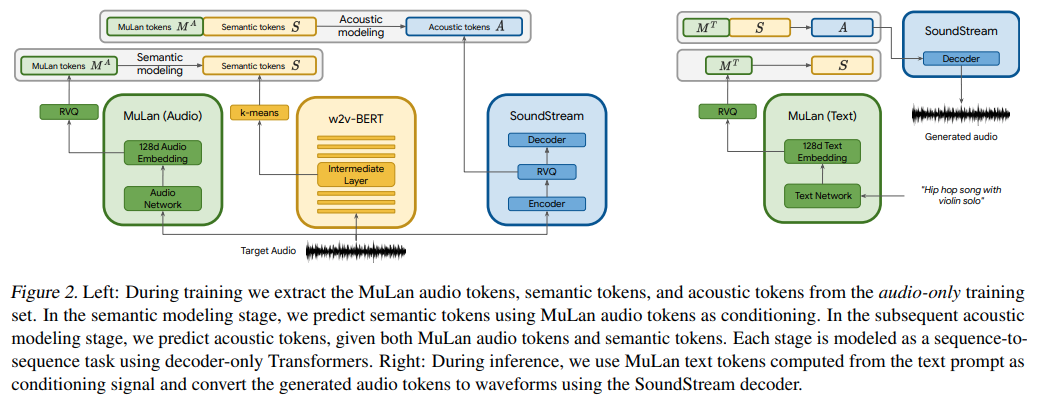


In [13]:
# 重启也要运行
import torch
from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer

audio_transformer = AudioSpectrogramTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64,
    spec_n_fft = 128,
    spec_win_length = 24,
    spec_aug_stretch_factor = 0.8
)

text_transformer = TextTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64
)

mulan = MuLaN(
    audio_transformer = audio_transformer,
    text_transformer = text_transformer
)

# get a ton of <sound, text> pairs and train

wavs = torch.randn(2, 1024)
texts = torch.randint(0, 20000, (2, 256))

loss = mulan(wavs, texts)
loss.backward()

# after much training, you can embed sounds and text into a joint embedding space
# for conditioning the audio LM

embeds = mulan.get_audio_latents(wavs)  # during training

embeds = mulan.get_text_latents(texts)  # during inference

spectrogram yielded shape of (65, 86), but had to be cropped to (64, 80) to be patchified for transformer


To obtain the conditioning embeddings for the three transformers that are a part of AudioLM, you must use the `MuLaNEmbedQuantizer` as so

## MusicLM

In [14]:
# 重启也要运行
from musiclm_pytorch import MuLaNEmbedQuantizer

# setup the quantizer with the namespaced conditioning embeddings, unique per quantizer as well as namespace (per transformer)

quantizer = MuLaNEmbedQuantizer(
    mulan = mulan,                          # pass in trained mulan from above
    conditioning_dims = (1024, 1024, 1024), # say all three transformers have model dimensions of 1024
    namespaces = ('semantic', 'coarse', 'fine')
)

# now say you want the conditioning embeddings for semantic transformer

wavs = torch.randn(2, 1024)
conds = quantizer(wavs = wavs, namespace = 'semantic') # (2, 8, 1024) - 8 is number of quantizers

## train Hubert模型，audioLM transformer training, train AudioLM,
To train (or finetune) the three transformers that are a part of `AudioLM`, you simply follow the instructions over at `audiolm-pytorch` for training, but pass in the `MulanEmbedQuantizer` instance to the training classes under the keyword `audio_conditioner`

ex. `SemanticTransformerTrainer`

验证路径是否正确

In [15]:
import os
print("Current working directory:", os.getcwd())
print("Files in './downloaded_audios':", os.listdir('./downloaded_audios'))


Current working directory: /content
Files in './downloaded_audios': ['0F-Z0zF1504.wav', '-Vo4CAMX26U.wav', '-O9mnfC61Ac.wav', '-Q9MTRXS4bE.wav', '-1OlgJWehn8.wav', '-lPXTBXa0tE.wav', '0DYH0sqDXB8.wav', '0LLlcPiatiU.wav', '-cLzki-B06o.wav', '-m9pH0WXQto.wav', '03z0rpIkm5g.wav', '-uaTK8sa5Ms.wav', '07xGXxIHOL4.wav', '-M6K3QoHh40.wav', '-jpbCWcz2pk.wav', '0RgGrVklaao.wav', '07-vpXo91XM.wav', '0bRUkLsttto.wav', '03frQGyrgQ4.wav', '-0vPFx-wRRI.wav', '-VclCul6FrI.wav', '0a91szM1Ivw.wav', '0J_TdiZ3TKA.wav', '0SNhAKyXtC8.wav', '04NjXsLyCl4.wav', '-Dtir74TiUM.wav', '0EOQco76eXQ.wav', '-v5hgCh3M2w.wav', '-bgHkxwoliw.wav', '-XN0NtrnfMY.wav', '-FEPOSP7ay0.wav', '-r2-9oyIzkQ.wav', '0NZY0GHQBP0.wav', '-pUfYFcsgG4.wav', '-_OzT7Xyvok.wav', '0DizopdPMBw.wav', '0abzD7hBTRk.wav', '-QuWdnmn-kM.wav', '-sRFfU8k0Zs.wav', '0fCpAuxrQ_I.wav', '0bP2MH3LqvI.wav', '-88me9bBzrk.wav', '0dPx94RPy2M.wav', '0QYNC7J05XI.wav', '-CUp_Tmg2Y0.wav', '0ONdm4sW47c.wav', '0Olm321vgk8.wav', '-mB_XLq6g1g.wav', '0RcMzUdXDRQ.wav', 


函数封装：将创建和使用训练器的代码封装在一个函数中。这有助于在函数结束时自动销毁局部变量，包括训练器实例。但这只在训练器没有修改全局状态或在内部维持静态/全局变量的情况下有效。
或者每次注释掉一个transformer，然后重启运行

防止触发

AssertionError: only one Trainer can be instantiated at a time for training



# 四、加载训练AudioLM

##训练三个 transformer

这三个transformer是 audioLM里面的

In [16]:

!pip install tensorboardX

!pip install nltk

!pip install librosa


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.1 MB/s eta 0:00:00


In [17]:
! pip install audiolm_pytorch


## 数据处理，音频和.csv文本做预处理

数据用不到，但是代码可以用来处理数据和音频的对齐。


In [18]:
# # process_audio.py
# import librosa
# import numpy as np
# import pandas as pd
# from nltk.tokenize import word_tokenize
# import nltk
# import torch
# import os
# import pickle

# nltk.download('punkt')

# def load_audio_file(file_path, sr=22050):
#     # 加载音频文件
#     # 'sr' 是采样率，22050 是常用值
#     audio, _ = librosa.load(file_path, sr=sr)
#     return audio


# def audio_to_melspectrogram(audio, sr=22050, n_mels=128, hop_length=512):
#     # 将音频转换为梅尔频谱图
#     melspec = librosa.feature.melspectrogram(audio, sr=sr, n_mels=n_mels, hop_length=hop_length)
#     melspec = librosa.power_to_db(melspec, ref=np.max)
#     return melspec


# def process_audio_files(file_paths, sr=22050, n_mels=128, hop_length=512):
#     processed_audios = []
#     valid_indices = []  # 用于存储有效音频的索引

#     for index, file_path in enumerate(file_paths):
#         try:
#             # 尝试加载和预处理音频文件
#             audio = load_audio_file(file_path, sr=sr)
#             melspec = audio_to_melspectrogram(audio, sr=sr, n_mels=n_mels, hop_length=hop_length)
#             processed_audios.append(melspec)
#             valid_indices.append(index)
#         except Exception as e:
#             print(f"Error processing {file_path}: {e}")

#     return processed_audios, valid_indices



# # 简单的文本预处理函数
# def preprocess_text(text):
#     # 转换为小写
#     text = text.lower()
#     # 基本标记化
#     tokens = word_tokenize(text)
#     return tokens

# def main():
#     # 加载 .csv 文件
#     csv_file = 'musiccaps-public.csv'
#     df = pd.read_csv(csv_file)

#     # 提取字段作为文本数据

#     captions = df['caption']
#     aspect_list = df['aspect_list']

#     # 应用预处理
#     preprocessed_captions = [preprocess_text(text) for text in captions]
#     preprocessed_aspects = [preprocess_text(text) for text in aspect_list]

#     #  并行结合
#     combined_data = list(zip(preprocessed_captions, preprocessed_aspects))



#     # 提取音频文件名
#     audio_filenames = df['ytid'].tolist()
#     # 构建音频文件的完整路径
#     audio_file_paths = [f'./downloaded_audios/{filename}.wav' for filename in audio_filenames]

#     # 初始化计数器
#     existing_files_count = 0

#     # 检查每个音频文件是否存在
#     for file_path in audio_file_paths:
#         if os.path.exists(file_path):
#             existing_files_count += 1

#     print(f"Total audio files in CSV: {len(audio_filenames)}")
#     print(f"Existing audio files: {existing_files_count}")


#     # 预处理音频数据，并获取有效音频文件的索引
#     audio_data, valid_audio_indices = process_audio_files(audio_file_paths)

#     # 根据有效音频文件的索引来同步文本数据
#     synced_text_data = [combined_data[i] for i in valid_audio_indices]


#     # 确保长度相同, audio_data 和 combined_data 是一一对应的
#     # assert len(audio_data) == len(synced_text_data)

#     # 保存处理后的数据
#     if not os.path.exists('processed_data'):
#         os.makedirs('processed_data')

#     with open('processed_data/audio_data.pkl', 'wb') as f:
#         pickle.dump(audio_data, f)

#     with open('processed_data/text_data.pkl', 'wb') as f:
#         pickle.dump(synced_text_data, f)

# if __name__ == "__main__":
#     main()



## 训练 Semantic Transformer

In [20]:
import torch
from audiolm_pytorch import HubertWithKmeans
from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
from audiolm_pytorch import SoundStream, FineTransformer, FineTransformerTrainer
from audiolm_pytorch import AudioLMSoundStream, AudioLM
import gc  # 导入垃圾回收模块
from musiclm_pytorch import MuLaNEmbedQuantizer
from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer

audio_transformer = AudioSpectrogramTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64,
    spec_n_fft = 128,
    spec_win_length = 24,
    spec_aug_stretch_factor = 0.8
)

text_transformer = TextTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64
)

mulan = MuLaN(
    audio_transformer = audio_transformer,
    text_transformer = text_transformer
)

# setup the quantizer with the namespaced conditioning embeddings, unique per quantizer as well as namespace (per transformer)

quantizer = MuLaNEmbedQuantizer(
    mulan = mulan,                          # pass in trained mulan from above
    conditioning_dims = (1024, 1024, 1024), # say all three transformers have model dimensions of 1024
    namespaces = ('semantic', 'coarse', 'fine')
)

# now say you want the conditioning embeddings for semantic transformer

wavs = torch.randn(2, 1024)
conds = quantizer(wavs = wavs, namespace = 'semantic') # (2, 8, 1024) - 8 is number of quantizers

# 公共变量
checkpoint_path = 'hubert_base_ls960.pt'
kmeans_path = 'hubert_base_ls960_L9_km500.bin'

audio_output_dir = './downloaded_audios'
batch_size = 1
data_max_length = 320 * 32
num_train_steps = 1_000_000

# 函数：训练 SemanticTransformer
def train_semantic_transformer():
    wav2vec = HubertWithKmeans(
        checkpoint_path=checkpoint_path,
        kmeans_path=kmeans_path
        )   # 每个函数中重新创建 wav2vec，后面会删掉


    if torch.cuda.is_available():
      semantic_transformer = SemanticTransformer(
          num_semantic_tokens=wav2vec.codebook_size,
          dim=1024,
          depth=6,
          audio_text_condition=True
          ).cuda()
    else:
      semantic_transformer = SemanticTransformer(
          num_semantic_tokens=wav2vec.codebook_size,
          dim=1024,
          depth=6,
          audio_text_condition=True
          )

    trainer = SemanticTransformerTrainer(
        transformer=semantic_transformer,
        wav2vec=wav2vec,
        audio_conditioner=quantizer,
        folder=audio_output_dir,
        batch_size=batch_size,
        data_max_length=data_max_length,
        num_train_steps=num_train_steps
        )

    trainer.train()
    torch.save(semantic_transformer.state_dict(), 'semantic_transformer.pth')
    print("save semantic_transformer.pth")
    del semantic_transformer, trainer, wav2vec
    gc.collect()  # 执行垃圾回收




train_semantic_transformer()


training with dataset of 187 samples and validating with randomly splitted 10 samples
0: loss: 6.437500476837158
0: valid loss 6.2922563552856445
0: saving model to results
training complete
save semantic_transformer.pth


## 训练 Coarse Transformer

重启代码后，直接运行后面代码

In [1]:
# 重启也要运行
!pip install musiclm-pytorch
!pip install --upgrade tensorflow tensorflow-io
!pip install audiolm_pytorch


In [2]:
import torch
from audiolm_pytorch import HubertWithKmeans
from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
from audiolm_pytorch import SoundStream, FineTransformer, FineTransformerTrainer
from audiolm_pytorch import AudioLMSoundStream, AudioLM, MusicLMSoundStream
import gc  # 导入垃圾回收模块
from musiclm_pytorch import MuLaNEmbedQuantizer
from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer

audio_transformer = AudioSpectrogramTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64,
    spec_n_fft = 128,
    spec_win_length = 24,
    spec_aug_stretch_factor = 0.8
)

text_transformer = TextTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64
)

mulan = MuLaN(
    audio_transformer = audio_transformer,
    text_transformer = text_transformer
)


# setup the quantizer with the namespaced conditioning embeddings, unique per quantizer as well as namespace (per transformer)

quantizer = MuLaNEmbedQuantizer(
    mulan = mulan,                          # pass in trained mulan from above
    conditioning_dims = (1024, 1024, 1024), # say all three transformers have model dimensions of 1024
    namespaces = ('semantic', 'coarse', 'fine')
)



# now say you want the conditioning embeddings for semantic transformer

wavs = torch.randn(2, 1024)
conds = quantizer(wavs = wavs, namespace = 'semantic') # (2, 8, 1024) - 8 is number of quantizers

# 公共变量
checkpoint_path = 'hubert_base_ls960.pt'
kmeans_path = 'hubert_base_ls960_L9_km500.bin'

audio_output_dir = './downloaded_audios'
batch_size = 1
data_max_length = 320 * 32
num_train_steps = 1_000_000

# 函数：训练 CoarseTransformer
def train_coarse_transformer():
    wav2vec = HubertWithKmeans(
        checkpoint_path=checkpoint_path,
        kmeans_path=kmeans_path
        )   # 每个函数中重新创建 wav2vec，后面会删掉
    soundstream = MusicLMSoundStream()

    if torch.cuda.is_available():
      coarse_transformer = CoarseTransformer(
          num_semantic_tokens=wav2vec.codebook_size,
          codebook_size=1024,
          num_coarse_quantizers=4,
          dim=1024,
          depth=6,
          audio_text_condition=True
          ).cuda()
    else:
      coarse_transformer = CoarseTransformer(
          num_semantic_tokens=wav2vec.codebook_size,
          codebook_size=1024,
          num_coarse_quantizers=4,
          dim=1024,
          depth=6,
          audio_text_condition=True
          )

    trainer = CoarseTransformerTrainer(
        transformer=coarse_transformer,
        codec=soundstream,
        wav2vec=wav2vec,
        audio_conditioner=quantizer,
        folder=audio_output_dir,
        batch_size=batch_size,
        data_max_length=data_max_length,
        num_train_steps=num_train_steps
        )

    trainer.train()
    torch.save(coarse_transformer.state_dict(), 'coarse_transformer.pth')
    print("save coarse_transformer.pth")
    del coarse_transformer, trainer, wav2vec, soundstream
    gc.collect()

train_coarse_transformer()


spectrogram yielded shape of (65, 86), but had to be cropped to (64, 80) to be patchified for transformer
training with dataset of 187 samples and validating with randomly splitted 10 samples
do you want to clear previous experiment checkpoints and results? (y/n) n
0: loss: 89.21683502197266
0: valid loss 12.97992992401123
0: saving model to results
training complete
save coarse_transformer.pth


## 训练 Fine Transformer

重启代码后，需要安装库

In [1]:
# 重启也要运行
!pip install musiclm-pytorch
!pip install --upgrade tensorflow tensorflow-io
!pip install audiolm_pytorch


In [ ]:
import torch
from audiolm_pytorch import HubertWithKmeans
from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
from audiolm_pytorch import SoundStream, FineTransformer, FineTransformerTrainer
from audiolm_pytorch import AudioLMSoundStream, AudioLM, MusicLMSoundStream
from musiclm_pytorch import MuLaNEmbedQuantizer
from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer
import gc  # 导入垃圾回收模块
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
import librosa
import numpy as np
import pickle


nltk.download('punkt')

# 公共变量
checkpoint_path = 'hubert_base_ls960.pt'
kmeans_path = 'hubert_base_ls960_L9_km500.bin'

audio_output_dir = './downloaded_audios'
batch_size = 1
data_max_length = 320 * 32
num_train_steps = 1_000_000

audio_transformer = AudioSpectrogramTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64,
    spec_n_fft = 128,
    spec_win_length = 24,
    spec_aug_stretch_factor = 0.8
)

text_transformer = TextTransformer(
    dim = 512,
    depth = 6,
    heads = 8,
    dim_head = 64
)

mulan = MuLaN(
    audio_transformer = audio_transformer,
    text_transformer = text_transformer
)

# setup the quantizer with the namespaced conditioning embeddings, unique per quantizer as well as namespace (per transformer)

quantizer = MuLaNEmbedQuantizer(
    mulan = mulan,                          # pass in trained mulan from above
    conditioning_dims = (1024, 1024, 1024), # say all three transformers have model dimensions of 1024
    namespaces = ('semantic', 'coarse', 'fine')
)



# 函数：训练 FineTransformer
def train_fine_transformer():
    soundstream = MusicLMSoundStream()

    if torch.cuda.is_available():
        fine_transformer = FineTransformer(
            num_coarse_quantizers = 4,
            num_fine_quantizers = 8,
            codebook_size = 1024,
            dim = 1024,
            depth = 6,
            audio_text_condition = True
                    ).cuda()
    else:
      fine_transformer = FineTransformer(
            num_coarse_quantizers = 4,
            num_fine_quantizers = 8,
            codebook_size = 1024,
            dim = 1024,
            depth = 6,
            audio_text_condition = True
                    )


    # 确保 Trainer 接收文本数据作为输入
    trainer = FineTransformerTrainer(
        transformer=fine_transformer,
        codec=soundstream,
        # audio_data=audio_data, # 原本想输入对应的音频，没有这个输入
        # text_data=combined_data, # 没有这个输入
        folder=audio_output_dir,
        batch_size=batch_size,
        data_max_length=data_max_length,
        num_train_steps=num_train_steps,
        audio_conditioner = quantizer
        )

    trainer.train()
    torch.save(fine_transformer.state_dict(), 'fine_transformer.pth')
    print("save fine_transformer.pth")
    del fine_transformer, trainer, soundstream
    gc.collect()


train_fine_transformer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


training with dataset of 187 samples and validating with randomly splitted 10 samples
do you want to clear previous experiment checkpoints and results? (y/n) n
spectrogram yielded shape of (65, 841), but had to be cropped to (64, 832) to be patchified for transformer
0: loss: 94.92457580566406
0: valid loss 9.719450950622559
0: saving model to results
1: loss: 10.307683944702148
2: loss: 5.287022590637207
3: loss: 4.613117218017578
4: loss: 11.41645336151123
5: loss: 7.272305965423584
6: loss: 8.450643539428711
7: loss: 4.728140830993652
8: loss: 3.8572635650634766
9: loss: 3.001547336578369
10: loss: 4.591131210327148
11: loss: 6.298219203948975
12: loss: 3.708010196685791
13: loss: 4.636425971984863
14: loss: 4.318438529968262
15: loss: 5.403580665588379
16: loss: 5.974900722503662
17: loss: 4.953211307525635
18: loss: 4.760310649871826
19: loss: 3.7015771865844727
20: loss: 4.862442970275879
21: loss: 2.4082000255584717
22: loss: 3.2899057865142822
23: loss: 4.265714168548584
24: lo

In [ ]:

# # 重启也要运行

# import array
# import torch
# import torchaudio
# from torch.utils.data import Dataset
# from torch.utils.data import DataLoader
# import soundfile
# from scipy.io.wavfile import read
# from musiclm_pytorch import MuLaN, AudioSpectrogramTransformer, TextTransformer
# from musiclm_pytorch import MuLaNEmbedQuantizer
# import os
# import pathlib
# import numpy
# import pandas



# audio_transformer = AudioSpectrogramTransformer(
#     dim = 512,
#     depth = 6,
#     heads = 8,
#     dim_head = 64,
#     spec_n_fft = 128,
#     spec_win_length = 24,
#     spec_aug_stretch_factor = 0.8
# )

# text_transformer = TextTransformer(
#     dim = 512,
#     depth = 6,
#     heads = 8,
#     dim_head = 64
# )

# mulan = MuLaN(
#     audio_transformer = audio_transformer,
#     text_transformer = text_transformer
# )

# # get a ton of <sound, text> pairs and train

# wavs = torch.randn(2, 1024)
# texts = torch.randint(0, 20000, (2, 256))

# loss = mulan(wavs, texts)
# loss.backward()

# # after much training, you can embed sounds and text into a joint embedding space
# # for conditioning the audio LM

# embeds = mulan.get_audio_latents(wavs)  # during training

# embeds = mulan.get_text_latents(texts)  # during inference


# # setup the quantizer with the namespaced conditioning embeddings, unique per quantizer as well as namespace (per transformer)

# quantizer = MuLaNEmbedQuantizer(
#     mulan = mulan,                          # pass in trained mulan from above
#     conditioning_dims = (1024, 1024, 1024), # say all three transformers have model dimensions of 1024
#     namespaces = ('semantic', 'coarse', 'fine')
# )

# # now say you want the conditioning embeddings for semantic transformer
# conds = quantizer(wavs = wavs, namespace = 'semantic') # (2, 8, 1024) - 8 is number of quantizers



## 加载AudioLM
把训练好的模型加载进来

In [ ]:
import torch
from audiolm_pytorch import HubertWithKmeans
from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
from audiolm_pytorch import FineTransformer, FineTransformerTrainer
from audiolm_pytorch import AudioLMSoundStream, AudioLM

# 创建并加载 AudioLM 实例
wav2vec = HubertWithKmeans(checkpoint_path=checkpoint_path, kmeans_path=kmeans_path) # 前面被删掉了
soundstream = AudioLMSoundStream()

if torch.cuda.is_available():
    semantic_transformer = SemanticTransformer(
      num_semantic_tokens=wav2vec.codebook_size,
      dim=1024,
      depth=6,
      audio_text_condition=True
    ).cuda()

    coarse_transformer = CoarseTransformer(
      num_semantic_tokens=wav2vec.codebook_size,
      codebook_size=1024,
      num_coarse_quantizers=4,
      dim=1024,
      depth=6,
      audio_text_condition=True
    ).cuda()

    fine_transformer = FineTransformer(
      num_coarse_quantizers=4,
      num_fine_quantizers=8,
      codebook_size=1024,
      dim=1024,
      depth=6,
      audio_text_condition=True
    ).cuda()
else:
    semantic_transformer = SemanticTransformer(
      num_semantic_tokens=wav2vec.codebook_size,
      dim=1024,
      depth=6,
      audio_text_condition=True
    )

    coarse_transformer = CoarseTransformer(
      num_semantic_tokens=wav2vec.codebook_size,
      codebook_size=1024,
      num_coarse_quantizers=4,
      dim=1024,
      depth=6,
      audio_text_condition=True
    )

    fine_transformer = FineTransformer(
      num_coarse_quantizers=4,
      num_fine_quantizers=8,
      codebook_size=1024,
      dim=1024,
      depth=6,
      audio_text_condition=True
    )



# 加载模型状态
semantic_transformer.load_state_dict(torch.load('semantic_transformer.pth'))
coarse_transformer.load_state_dict(torch.load('coarse_transformer.pth'))
fine_transformer.load_state_dict(torch.load('fine_transformer.pth'))

audiolm = AudioLM(wav2vec=wav2vec, codec=soundstream, semantic_transformer=semantic_transformer, coarse_transformer=coarse_transformer, fine_transformer=fine_transformer)


下面是可能会缺失的参数

In [ ]:
# # 重启也要运行
# import torch
# from audiolm_pytorch import HubertWithKmeans
# from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer, SoundStream
# from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
# from audiolm_pytorch import FineTransformer, FineTransformerTrainer
# from audiolm_pytorch import AudioLMSoundStream, MusicLMSoundStream
# from unittest import mock
# import multiprocessing as mp
# import gc  # 导入垃圾回收模块


# # 设置多进程启动方式为 'spawn'
# mp.set_start_method('spawn', force=True)

# def train_semantic_transformer_process(checkpoint_path, kmeans_path):
#     wav2vec = HubertWithKmeans(checkpoint_path=checkpoint_path, kmeans_path=kmeans_path)
#     semantic_transformer = SemanticTransformer(
#         num_semantic_tokens = wav2vec.codebook_size,
#         dim = 1024,
#         depth = 6,
#         audio_text_condition = True      # this must be set to True (same for CoarseTransformer and FineTransformers)
#     ).cuda()

#     trainer = SemanticTransformerTrainer(
#         transformer = semantic_transformer,
#         wav2vec = wav2vec,
#         audio_conditioner = quantizer,   # pass in the MulanEmbedQuantizer instance above
#         folder ='./downloaded_audios',
#         batch_size = 1,
#         data_max_length = 320 * 32,
#         num_train_steps = 1
#     )

#     trainer.train()
#     torch.save(semantic_transformer.state_dict(), '/content/semantic_transformer.pth') # 保存模型
# #     del trainer  # 显式删除实例，删除好像没有效果，需要存下来重启


# def train_coarse_transformer_process(checkpoint_path, kmeans_path):
#     wav2vec = HubertWithKmeans(checkpoint_path=checkpoint_path, kmeans_path=kmeans_path)
#     soundstream = MusicLMSoundStream()

#     coarse_transformer = CoarseTransformer(
#         num_semantic_tokens = wav2vec.codebook_size,
#         codebook_size = 1024,
#         num_coarse_quantizers = 4,
#         dim = 1024,
#         depth = 6,
#         audio_text_condition = True
#     ).cuda()

#     with mock.patch('builtins.input', return_value='n'):
#         trainer = CoarseTransformerTrainer(
#             transformer = coarse_transformer,
#             codec = soundstream,
#             wav2vec = wav2vec,
#             audio_conditioner = quantizer,
#             folder = './downloaded_audios/',
#             batch_size = 1,
#             data_max_length = 320 * 32,
#             num_train_steps = 1
#         )
#         trainer.train()
#         # 保存模型状态字典
#         torch.save(coarse_transformer.state_dict(), '/content/coarse_transformer.pth') # 保存模型


# def train_fine_transformer_process():
#     soundstream = MusicLMSoundStream()
#     fine_transformer = FineTransformer(
#         num_coarse_quantizers = 4,
#         num_fine_quantizers = 8,
#         codebook_size = 1024,
#         dim = 1024,
#         depth = 6,
#         audio_text_condition = True
#     ).cuda()

#     with mock.patch('builtins.input', return_value='n'):
#         trainer = FineTransformerTrainer(
#             transformer = fine_transformer,
#             codec = soundstream,
#             folder = './downloaded_audios/',
#             batch_size = 1,
#             data_max_length = 320 * 32,
#             num_train_steps = 1,
#             audio_conditioner = quantizer
#         )

#         trainer.train()
#         torch.save(fine_transformer.state_dict(), '/content/fine_transformer.pth') # 保存模型



# def run_training_process(train_function, *args):
#     process = mp.Process(target=train_function, args=args)
#     process.start()
#     process.join()  # 等待进程结束



# def train_all_transformers():

#     # 加载 wav2vec 的参数
#     checkpoint_path = 'hubert_base_ls960.pt'
#     kmeans_path = 'hubert_base_ls960_L9_km500.bin'

#     # 多线程运行
#     run_training_process(train_semantic_transformer_process, checkpoint_path, kmeans_path)
#     run_training_process(train_coarse_transformer_process, checkpoint_path, kmeans_path)
#     run_training_process(train_fine_transformer_process)

# train_all_transformers()


# 解决one trainer问题--没有解决


暂时无法解决，必须要不断重启。

## 使用不同的.py文件来调用 解决冲突-无效

因为方法不能避免 one trainer的问题，所以暂时不用。

生成`train_semantic_transformer.py`

In [ ]:
# # train_semantic_transformer.py
# import torch
# from audiolm_pytorch import HubertWithKmeans
# from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
# from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
# from audiolm_pytorch import FineTransformer, FineTransformerTrainer
# from audiolm_pytorch import AudioLMSoundStream, AudioLM
# import gc  # 导入垃圾回收模块

# # 公共变量
# checkpoint_path = 'hubert_base_ls960.pt'
# kmeans_path = 'hubert_base_ls960_L9_km500.bin'

# audio_output_dir = './downloaded_audios'
# batch_size = 1
# data_max_length = 320 * 32
# num_train_steps = 1

# # 函数：训练 SemanticTransformer
# def train_semantic_transformer():
#     wav2vec = HubertWithKmeans(checkpoint_path=checkpoint_path, kmeans_path=kmeans_path)   # 每个函数中重新创建 wav2vec，后面会删掉
#     soundstream = AudioLMSoundStream()
#     semantic_transformer = SemanticTransformer(num_semantic_tokens=wav2vec.codebook_size, dim=1024, depth=6, audio_text_condition=True).cuda()
#     trainer = SemanticTransformerTrainer(transformer=semantic_transformer, wav2vec=wav2vec, audio_conditioner=quantizer, folder=audio_output_dir, batch_size=batch_size, data_max_length=data_max_length, num_train_steps=num_train_steps)
#     trainer.train()
#     torch.save(semantic_transformer.state_dict(), 'semantic_transformer.pth')
#     del semantic_transformer, trainer, wav2vec
#     gc.collect()  # 执行垃圾回收



# # 依次训练每个模型
# train_semantic_transformer()


`train_coarse_transformer.py`

In [ ]:
# # train_coarse_transformer.py
# import torch
# from audiolm_pytorch import HubertWithKmeans
# from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
# from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
# from audiolm_pytorch import FineTransformer, FineTransformerTrainer
# from audiolm_pytorch import AudioLMSoundStream, AudioLM
# import gc  # 导入垃圾回收模块

# # 公共变量
# checkpoint_path = 'hubert_base_ls960.pt'
# kmeans_path = 'hubert_base_ls960_L9_km500.bin'

# audio_output_dir = './downloaded_audios'
# batch_size = 1
# data_max_length = 320 * 32
# num_train_steps = 1

# # 函数：训练 CoarseTransformer
# def train_coarse_transformer():
#     wav2vec = HubertWithKmeans(checkpoint_path=checkpoint_path, kmeans_path=kmeans_path)   # 每个函数中重新创建 wav2vec，后面会删掉
#     soundstream = AudioLMSoundStream()

#     coarse_transformer = CoarseTransformer(num_semantic_tokens=wav2vec.codebook_size, codebook_size=1024, num_coarse_quantizers=4, dim=1024, depth=6, audio_text_condition=True).cuda()
#     trainer = CoarseTransformerTrainer(transformer=coarse_transformer, codec=soundstream, wav2vec=wav2vec, audio_conditioner=quantizer, folder=audio_output_dir, batch_size=batch_size, data_max_length=data_max_length, num_train_steps=num_train_steps)
#     trainer.train()
#     torch.save(coarse_transformer.state_dict(), 'coarse_transformer.pth')
#     del coarse_transformer, trainer, wav2vec, soundstream
#     gc.collect()

# train_coarse_transformer()





`train_fine_transformer.py`

In [ ]:
# # train_fine_transformer.py

# import torch
# from audiolm_pytorch import HubertWithKmeans
# from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer
# from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
# from audiolm_pytorch import FineTransformer, FineTransformerTrainer
# from audiolm_pytorch import AudioLMSoundStream, AudioLM
# import gc  # 导入垃圾回收模块

# # 公共变量
# checkpoint_path = 'hubert_base_ls960.pt'
# kmeans_path = 'hubert_base_ls960_L9_km500.bin'

# audio_output_dir = './downloaded_audios'
# batch_size = 1
# data_max_length = 320 * 32
# num_train_steps = 1


# # 函数：训练 FineTransformer
# def train_fine_transformer():
#     soundstream = AudioLMSoundStream()

#     fine_transformer = FineTransformer(num_coarse_quantizers=4, num_fine_quantizers=8, codebook_size=1024, dim=1024, depth=6, audio_text_condition=True).cuda()
#     trainer = FineTransformerTrainer(transformer=fine_transformer, codec=soundstream, folder=audio_output_dir, batch_size=batch_size, data_max_length=data_max_length, num_train_steps=num_train_steps)
#     trainer.train()
#     torch.save(fine_transformer.state_dict(), 'fine_transformer.pth')
#     del fine_transformer, trainer, soundstream
#     gc.collect()

# train_fine_transformer()

强制覆盖文件

In [ ]:
# !wget -O train_semantic_transformer.py https://raw.githubusercontent.com/Huang-Yongzhi/MusicLM_Jupyter/main/train_semantic_transformer.py
# !wget -O train_coarse_transformer.py https://raw.githubusercontent.com/Huang-Yongzhi/MusicLM_Jupyter/main/train_coarse_transformer.py
# !wget -O train_fine_transformer.py https://raw.githubusercontent.com/Huang-Yongzhi/MusicLM_Jupyter/main/train_fine_transformer.py
# !wget -O process_audio.py https://raw.githubusercontent.com/Huang-Yongzhi/MusicLM_Jupyter/main/process_audio.py

In [ ]:
# !ls

In [ ]:

# !pip install tensorboardX

# !pip install nltk

# !pip install librosa

# ! pip install audiolm_pytorch

# %run process_audio.py

# %run train_semantic_transformer.py

# %run train_coarse_transformer.py


## 使用单线程调用解决 one trainer问题--无效

下面是单线程运行，但是需要每次调用一个网络训练。

In [ ]:
# # 重启也要运行
# import torch
# from audiolm_pytorch import HubertWithKmeans
# from audiolm_pytorch import SemanticTransformer, SemanticTransformerTrainer, SoundStream
# from audiolm_pytorch import CoarseTransformer, CoarseTransformerTrainer
# from audiolm_pytorch import FineTransformer, FineTransformerTrainer
# from audiolm_pytorch import AudioLMSoundStream, MusicLMSoundStream
# from unittest import mock
# import multiprocessing


# def train_semantic_transformer(wav2vec):

#     semantic_transformer = SemanticTransformer(
#         num_semantic_tokens = wav2vec.codebook_size,
#         dim = 1024,
#         depth = 6,
#         audio_text_condition = True      # this must be set to True (same for CoarseTransformer and FineTransformers)
#     ).cuda()

#     trainer = SemanticTransformerTrainer(
#         transformer = semantic_transformer,
#         wav2vec = wav2vec,
#         audio_conditioner = quantizer,   # pass in the MulanEmbedQuantizer instance above
#         folder ='./downloaded_audios',
#         batch_size = 1,
#         data_max_length = 320 * 32,
#         num_train_steps = 1
#     )

#     trainer.train()
#     torch.save(semantic_transformer.state_dict(), 'semantic_transformer.pth') # 保存模型
#     del trainer  # 显式删除实例，删除好像没有效果，需要存下来重启


# def train_coarse_transformer(wav2vec, soundstream):

#     coarse_transformer = CoarseTransformer(
#         num_semantic_tokens = wav2vec.codebook_size,
#         codebook_size = 1024,
#         num_coarse_quantizers = 4,
#         dim = 1024,
#         depth = 6,
#         audio_text_condition = True
#     ).cuda()

#     with mock.patch('builtins.input', return_value='n'):
#         trainer = CoarseTransformerTrainer(
#             transformer = coarse_transformer,
#             codec = soundstream,
#             wav2vec = wav2vec,
#             audio_conditioner = quantizer,
#             folder = './downloaded_audios/',
#             batch_size = 1,
#             data_max_length = 320 * 32,
#             num_train_steps = 1
#         )
#         trainer.train()
#         # 保存模型状态字典
#         torch.save(coarse_transformer.state_dict(), 'coarse_transformer.pth') # 保存模型

# def train_fine_transformer(soundstream):
#     fine_transformer = FineTransformer(
#         num_coarse_quantizers = 4,
#         num_fine_quantizers = 8,
#         codebook_size = 1024,
#         dim = 1024,
#         depth = 6,
#         audio_text_condition = True
#     ).cuda()

#     with mock.patch('builtins.input', return_value='n'):
#         trainer = FineTransformerTrainer(
#             transformer = fine_transformer,
#             codec = soundstream,
#             folder = './downloaded_audios/',
#             batch_size = 1,
#             data_max_length = 320 * 32,
#             num_train_steps = 1,
#             audio_conditioner = quantizer
#         )

#         trainer.train()
#         torch.save(fine_transformer.state_dict(), 'fine_transformer.pth') # 保存模型

# def train_all_transformers():
#      # soundstream = SoundStream.init_and_load_from('/path/to/trained/soundstream.pt')
#     soundstream = MusicLMSoundStream()
#     # 重新加载 wav2vec 和 soundstream
#     wav2vec = HubertWithKmeans(
#         checkpoint_path='hubert_base_ls960.pt',
#         kmeans_path='hubert_base_ls960_L9_km500.bin'
#     )

#    # 训练 SemanticTransformer
#     train_semantic_transformer(wav2vec)
#     # 训练 CoarseTransformer
#     train_coarse_transformer(wav2vec, soundstream)

#     # 训练 FineTransformer
#     train_fine_transformer(soundstream)

# train_all_transformers()


调用训练模型

In [ ]:
# train_semantic_transformer()


# 五、把mulan和AudioLM加载生成MusicLM


In [ ]:
# you need the trained AudioLM (audio_lm) from above
# with the MulanEmbedQuantizer (mulan_embed_quantizer)

from musiclm_pytorch import MusicLM

if torch.cuda.is_available():
    musiclm = MusicLM(
    audio_lm = audiolm,
    mulan_embed_quantizer = quantizer
    ).cuda()
else:
  musiclm = MusicLM(
    audio_lm = audiolm,
    mulan_embed_quantizer = quantizer
    )




## 测试

In [ ]:
music = musiclm('the crystalline sounds of the piano in a ballroom', num_samples = 1) # sample 4 and pick the top match with mulan

In [ ]:
torch.save(music, 'generated_music.pt')

In [ ]:
output_path = "out.wav"
sample_rate = 44100
torchaudio.save(output_path, music.cpu() , sample_rate)